In [1]:
# Real estate data analysis (after Covid outbreak - February till July 16, 2020 )

In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading property sales data file
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')

In [4]:
ppt_df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,45706,2020-02-01,780000.0,Rowville,Melbourne,VIC,-37.935166,145.246339,3,house,VIC2209,VIC128,3178.0
1,45707,2020-02-01,1675000.0,Sorrento,Melbourne,VIC,-38.352699,144.752381,4,house,VIC2311,VIC125,3943.0
2,45708,2020-02-01,492000.0,Southbank,Melbourne,VIC,-37.827084,144.957564,1,unit,VIC2319,VIC107,3006.0
3,45709,2020-02-01,540000.0,Southbank,Melbourne,VIC,-37.825159,144.962701,2,unit,VIC2319,VIC107,3006.0
4,45710,2020-02-01,675000.0,Keysborough,Melbourne,VIC,-38.002381,145.164533,3,townhouse,VIC1334,VIC91,3173.0


In [7]:
# calculating stats

avg_price = ppt_df.price.mean()
median_price = ppt_df.price.median()
lowest_price = ppt_df.price.min()
highest_price = ppt_df.price.max()

lowest_priced_sub = ppt_df.loc[ppt_df['price']==lowest_price]['suburb'].values
highest_priced_sub = ppt_df.loc[ppt_df['price']==highest_price]['suburb'].values

In [8]:
# lowest & highest values property sold
print(f"The suburb has the lowest priced property sold AU$ {lowest_price:0,.0f} during the period is {lowest_priced_sub}");
print(f"The suburb has the highest priced property sold AU$ {highest_price:0,.0f} during the period is {highest_priced_sub}");

The average, median values of property sold during the period are: AU$ 767,924 and AU$ 652,000
The suburb has the lowest priced property sold AU$ 1,000 during the period is ['Werribee']
The suburb has the highest priced property sold AU$ 7,573,100 during the period is ['Craigieburn']


The average values of property sold during the period is: AU$ 767,924
The median values of property sold during the period is: AU$ 652,000


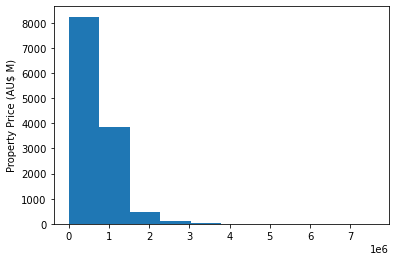

In [95]:
# histogram chart

print(f"The average values of property sold during the period is: AU$ {avg_price:0,.0f}")
print(f"The median values of property sold during the period is: AU$ {median_price:0,.0f}")
plt.hist(ppt_df.price);
plt.ylabel("Property Price (AU$ M)")
plt.show()

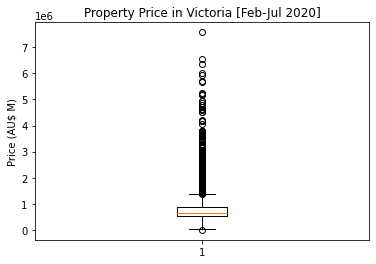

In [93]:
# boxplot chart

plt.boxplot(ppt_df.price);
plt.title('Property Price in Victoria [Feb-Jul 2020]')
plt.ylabel('Price (AU$ M)')
plt.show()

In [103]:
# Calculation of IQR and Outliers


quartiles = ppt_df.price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of property price is: {lowerq:0,.0f}")
print(f"The upper quartile of property price is: {upperq:0,.0f}")
print(f"The interquartile range of property price is: {iqr:0,.0f}")
print(f"The median of property price is: {quartiles[0.5]:0,.0f}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:0,.0f} could be outliers.")
print(f"Values above {upper_bound:0,.0f} could be outliers.")

The lower quartile of property price is: 525,000
The upper quartile of property price is: 872,500
The interquartile range of property price is: 347,500
The median of property price is: 652,000
Values below 3,750 could be outliers.
Values above 1,393,750 could be outliers.


In [113]:
ppt_by_month = ppt_df.groupby('date_sold').count().reset_index()
ppt_by_month.head()

,date_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,2020-02-01,71,71,71,71,71,71,71,71,71,71,71,71
1,2020-02-02,18,18,18,18,18,18,18,18,18,18,18,18
2,2020-02-03,80,80,80,80,80,80,80,80,80,80,80,80
3,2020-02-04,93,93,93,93,93,93,93,93,93,93,93,93
4,2020-02-05,67,67,67,67,67,67,67,67,67,67,67,67


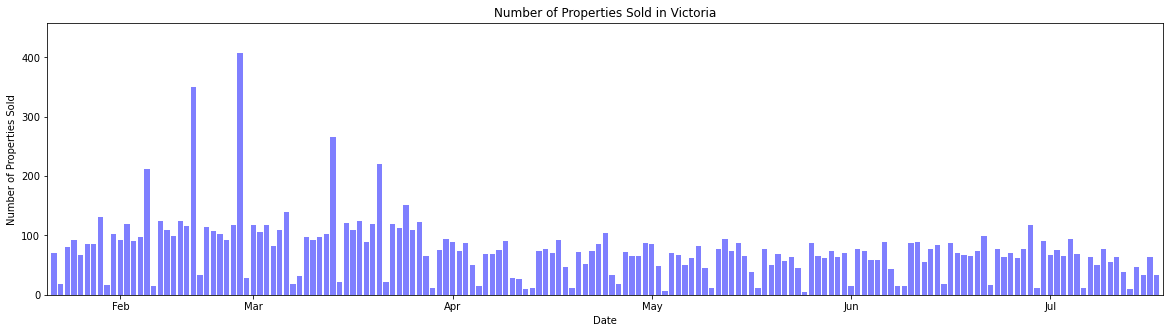

In [125]:
# property sold by date
y_axis = ppt_by_month.suburb
x_axis = ppt_by_month.date_sold
plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [10, 30, 60, 90, 120, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Date')
plt.ylabel('Number of Properties Sold')
plt.title('Number of Properties Sold in Victoria')
plt.show()

In [108]:
ppt_by_month['date_sold'] = ppt_by_month['date_sold'].astype(str);
ppt_by_month['month_sold'] = ppt_by_month.date_sold.apply(lambda x: x[5:7])
ppt_by_month = ppt_by_month.groupby('month_sold').sum().reset_index()
ppt_by_month

,month_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,02,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274,3274
1,03,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093
2,04,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794
3,05,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785
4,06,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959
5,07,850,850,850,850,850,850,850,850,850,850,850,850


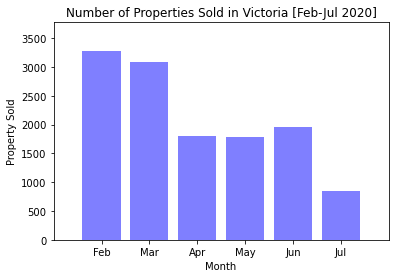

In [109]:
y_axis = ppt_by_month.suburb
x_axis = ppt_by_month.month_sold
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+500)
plt.xlabel('Month')
plt.ylabel('Property Sold')
plt.title('Number of Properties Sold in Victoria [Feb-Jul 2020]')
plt.show()